# spellops

> Harness the power of speLL with spellops to write clean and readable pipelines.

Welcome to `spellops`, a Python package that extends the capabilities of fastcore’s powerful L class with innovative operators designed to streamline your data transformation workflows. Inspired by the speLL (Single Pipeline L-chain) approach, spellops empowers you to construct fluent, maintainable, and debug-friendly pipelines in a single, readable statement. 

## Developer Guide

Instead of writing this:
```python
L(f_c(L(...).map(f_a).filter(f_b))).map(f_d)[0]
```

With `spellops`'s `pipe` operator, you can visually maintain the order of execution (`f_a → filter(f_b) → f_c → f_d`) by writing this:
```python
L(...).map(f_a).filter(f_b).pipe(f_c).map(f_d)[0]
```

And with `tee` operator, you can inspect and document your pipeline like this:
```python
(L(...)             .tee('input data')
    .map(f_a)       .tee('apply f_a to individual elements')
    .filter(f_b)    .tee('filter by f_b')
    .pipe(f_c)      .tee('apply f_c to the whole list')
    .map(f_d)[0]    .tee('finally apply f_d to the resulting elements and returning first value')
)
```

And once you're done, you can keep all of this in your production code:
```python
def process(data,verbose=False):
    s = dict(show=verbose)
    return (L(data)     .tee('input data', **s)
        .map(f_a)       .tee('apply f_a to individual elements', **s)
        .filter(f_b)    .tee('filter by f_b', **s)
        .pipe(f_c)      .tee('apply f_c to the whole list', **s)
        .map(f_d)       .tee('finally apply f_d to the resulting elements and returning first value', **s)
        .unwrap()       # Extract the element out of the list
    )
```

Here are some examples:

## Import `L` and `spellops`

NOTE: order of import does not matters.

In [ ]:
import spellops
from fastcore.foundation import L

### Fluent string manipulaiton

In [ ]:
L(['a', 'b', 'c']).map(str.upper).pipe('->'.join, wrap=False)

'A->B->C'

Or using convenience mehtod `pipen` that stands for `pipe` with `wrap=False` (no `wrap`):

In [ ]:
L(['a', 'b', 'c']).map(str.upper).pipen('->'.join)

'A->B->C'

### Count how many elements are present in both sublists


In [ ]:
(L([[1,2,3,2],[2,4,1]])    .tee('input')
     .map(set)             .tee('to set')
     .starpipe(set.intersection)  .tee('common elements')
     .pipe(len)            .tee('count elements')
     .unwrap()
)

input
[[1, 2, 3, 2], [2, 4, 1]]
to set
[{1, 2, 3}, {1, 2, 4}]
common elements
[1, 2]
count elements
[2]


2

An alternative approach can be to pipe with `wrap=False`:

**NOTE:** In this case, you can't use `tee` after the final `pipe` operator because it no longer returns an `L` instance.

In [ ]:
(L([[1,2,3,2],[2,4,1]])    .tee('input')
     .map(set)             .tee('to set')
     .starpipe(set.intersection)  .tee('common elements')
     .pipe(len, wrap=False) # count elements
)

input
[[1, 2, 3, 2], [2, 4, 1]]
to set
[{1, 2, 3}, {1, 2, 4}]
common elements
[1, 2]


2

### Solve an AoC task
**SPOILER ALERT**: the following is a `speLL` to solve AoC 2024 part B.

**GOAL**: For each number in the left list, we need to count how many times it appears in the right list, multiply these together, and sum all results. This creates a "similarity score", counting occurrences and multiplying, that measures how frequently numbers from the left list appear in the right list.

In [ ]:
sample = '''3   4
4   3
2   5
1   3
3   9
3   3
'''

# This function will be "mapped" to individual elements
def to_int_tuple(a,b): return (int(a),int(b))

# this function acts on the whole list
def count_instances(As,Bs): return [(o,len([t for t in Bs if t==o])) for  o in As]

from math import prod
(L(sample.splitlines())
                .map(str.split)         .tee('input data')
                .starmap(to_int_tuple)  .tee('int to tuples')
                .zip(cycled=True)       .tee('tuple of lists')
                .starpipe(count_instances)  .tee('apply count_instances to the "whole list"')
                .map(prod)              .tee('multiply tuple elements')
                .sum()
    )

input data
[['3', '4'], ['4', '3'], ['2', '5'], ['1', '3'], ['3', '9'], ['3', '3']]
int to tuples
[(3, 4), (4, 3), (2, 5), (1, 3), (3, 9), (3, 3)]
tuple of lists
[(3, 4, 2, 1, 3, 3), (4, 3, 5, 3, 9, 3)]
apply count_instances to the "whole list"
[(3, 3), (4, 1), (2, 0), (1, 0), (3, 3), (3, 3)]
multiply tuple elements
[9, 4, 0, 0, 9, 9]


31

### Visually inspect images transformations:

(#2) [array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]]),array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])]

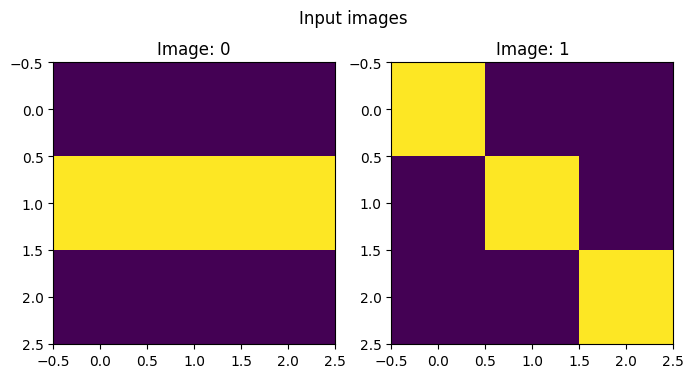

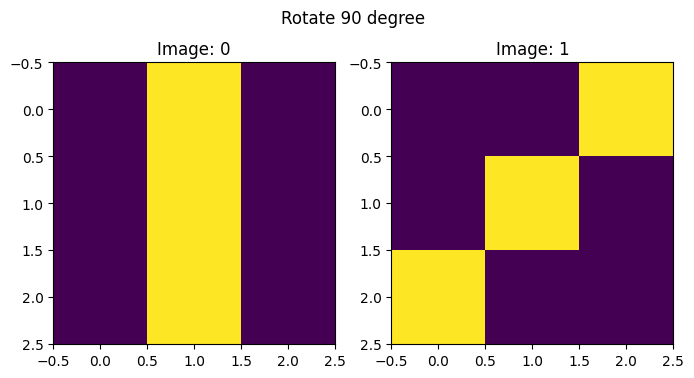

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(x:L, msg):
    N = len(x)
    plt.figure(figsize=(4*N,4))
    for i,o in enumerate(x):
        plt.subplot(1,N,i+1)
        plt.imshow(o)
        plt.title(f'Image: {i}')
    plt.suptitle(msg)

(L([[[0,0,0],[1,1,1],[0,0,0]],[[1,0,0],[0,1,0],[0,0,1]]])  .tee('Input images',f=plot_images)
    .map(lambda x: np.rot90(x,k=1)) .tee('Rotate 90 degree',f=plot_images)
)

### Install spellops in Development mode

```sh
# make sure spellops package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to spellops
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/artste/spellops.git
```

or from [pypi][pypi]


```sh
$ pip install spellops
```


[repo]: https://github.com/artste/spellops
[docs]: https://artste.github.io/spellops/
[pypi]: https://pypi.org/project/spellops/